In [14]:
from _preprocessing import CryptoCompareReader, drop_columns_deemed_as_useless

reader = CryptoCompareReader('btc', '../cryptoCompareData', drop_na_subset=['close'], add_time_columns=True,drop_last=True)
df = reader.read()
df = drop_columns_deemed_as_useless(df)
df.head(5)

,time,high,low,close,BTCTradedToUSD,USDTradedToBTC,new_addresses,active_addresses,transaction_count,large_transaction_count,...,block_size,current_supply,reddit_subscribers,reddit_active_users,reddit_posts_per_hour,reddit_posts_per_day,reddit_comments_per_hour,reddit_comments_per_day,dayOfTheWeek,monthOfTheYear
0,2010-07-17,0.04951,0.04951,0.04951,20.00,0.9902,447.0,804.0,408.0,0.0,...,730.0,3439000.0,NaN,NaN,NaN,NaN,NaN,NaN,5,7
1,2010-07-18,0.08585,0.05941,0.08584,75.01,5.0920,467.0,917.0,420.0,0.0,...,846.0,3447600.0,NaN,NaN,NaN,NaN,NaN,NaN,6,7
2,2010-07-19,0.09307,0.07723,0.08080,574.00,49.6600,605.0,972.0,528.0,0.0,...,837.0,3456300.0,NaN,NaN,NaN,NaN,NaN,NaN,0,7
3,2010-07-20,0.08181,0.07426,0.07474,262.00,20.5900,674.0,906.0,594.0,0.0,...,1065.0,3465350.0,NaN,NaN,NaN,NaN,NaN,NaN,1,7
4,2010-07-21,0.07921,0.06634,0.07921,575.00,42.2600,469.0,809.0,463.0,0.0,...,623.0,3475700.0,NaN,NaN,NaN,NaN,NaN,NaN,2,7


### time and prices
 - time (1) : dont have to take the log
 - [high,low,close,BTCTradedToUSD,USDTradedToBTC] (5) : take the log since these span across different magnitudes
### other columns:


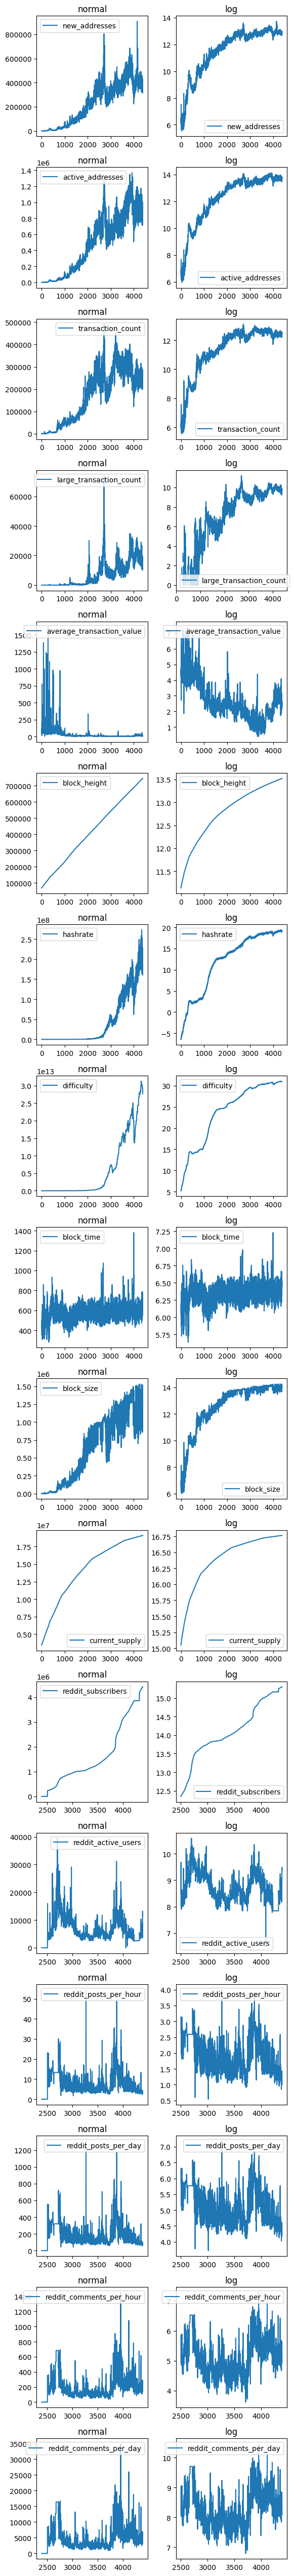

In [13]:
import numpy as np
import matplotlib.pyplot as plt
columns = ['high','low','close','BTCTradedToUSD','USDTradedToBTC'] + ['time']
columns = [col for col in df.columns if col not in columns + ['dayOfTheWeek','monthOfTheYear']]

fig,axes = plt.subplots(nrows=len(columns), ncols=2,figsize=(6,len(columns)*3))
for idx,col in enumerate(columns):
    df[[col]].plot(ax = axes[idx][0])
    axes[idx][0].set_title('normal')
    np.log(df[[col]]).plot(ax = axes[idx][1])
    axes[idx][1].set_title('log')
plt.tight_layout()

### conclusion:
  - [new_addresses, active_addresses, transaction_count,large_transaction_count, average_transaction_value] : respond nicely to taking the log
  - [block_height,hashrate, difficulty, block_time, block_size] : should be probably dropped since these are basically the results of the transactions
  - lets keep current_supply untransformed as for logarithms
  - lets keep reddit_data untransformed as for logarithms